In [1]:
import os
import sys

# os.path.join(os.path.dirname(__file__)
sys.path.append("../")  # location of config file
sys.path.append("../../") 


import config

os.chdir("../../") # working directory inside exploration

import glob
import numpy as np
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
from smartprint import smartprint as sprint
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

london 4 1 55


london_55_days processed:  91%|████████████▊ | 215/235 [00:00<00:00, 431.35it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4


self.key_dimensions(), tcount, vcount : london-4-1-55- 9030 9460
 : 9030 9030
 : 9460 9460


Iterating over 100 random source files: 100%|█| 100/100 [02:29<00:00,  1.49s/it]


prefix : london-4-1-55-
melbourne 4 1 55


melbourne_55_days processed:  91%|█████████ | 213/235 [00:00<00:00, 6451.80it/s]


start_date, end_date : 2020-12-31 2020-12-30
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 213


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/melbourn


self.key_dimensions(), tcount, vcount : melbourne-4-1-55- 9030 9288
 : 9030 9030
 : 9288 9288


Iterating over 100 random source files: 100%|█| 100/100 [02:39<00:00,  1.60s/it]


prefix : melbourne-4-1-55-
madrid 4 1 55


madrid_55_days processed:  91%|███████████▊ | 214/235 [00:00<00:00, 1505.80it/s]


start_date, end_date : 2022-01-01 2021-12-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 214


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/madrid-4


self.key_dimensions(), tcount, vcount : madrid-4-1-55- 9030 9374
 : 9030 9030
 : 9374 9374


Iterating over 100 random source files: 100%|█| 100/100 [02:30<00:00,  1.50s/it]


prefix : madrid-4-1-55-


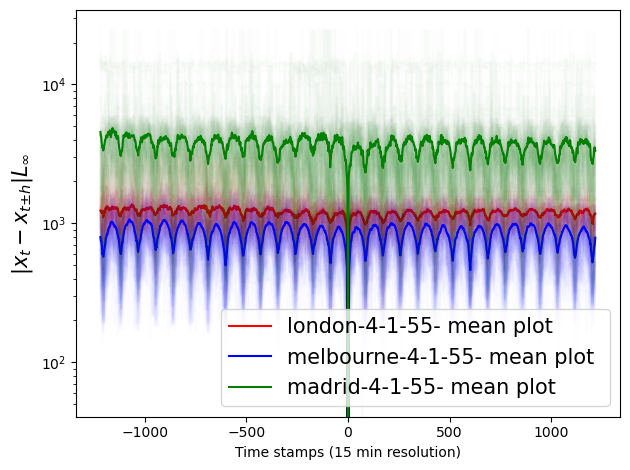

In [3]:
for city_ in config.city_list:
    city = city_.lower() 
    for io_len in [4]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                for _ in tqdm(range(100), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    
                    
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset < 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 2 weeks before and 2 weeks after
                    for i in range(n-14*obj.offset, n+14*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        
                    multiple_source_distance_list.append(dist_list)
                    plt.plot(range(-14*obj.offset, 14*obj.offset), (dist_list), alpha=0.01, color=city_color[city])
                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                
                mean_plot = (np.mean(multiple_source_distance_list, axis=0))
                plt.plot(range(-14*obj.offset, +14*obj.offset), (mean_plot), label= prefix + " mean plot ", color=city_color[city])
                
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("Time stamps (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("city_list_scales_4_1.png", dpi=600)
plt.show()   # obj._clean_intermediate_files()

london 4 1 55


london_55_days processed:  91%|███████████▉ | 215/235 [00:00<00:00, 3465.02it/s]


start_date, end_date : 2020-02-01 2020-01-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 215


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4
Iterating over 100 random source files: 100%|███| 10/10 [00:08<00:00,  1.19it/s]


prefix : london-4-1-55-
melbourne 4 1 55


melbourne_55_days processed:  91%|█████████ | 213/235 [00:00<00:00, 8857.60it/s]


start_date, end_date : 2020-12-31 2020-12-30
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 213


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/melbourn
Iterating over 100 random source files: 100%|███| 10/10 [00:07<00:00,  1.26it/s]


prefix : melbourne-4-1-55-
madrid 4 1 55


madrid_55_days processed:  91%|███████████▊ | 214/235 [00:00<00:00, 5961.97it/s]


start_date, end_date : 2022-01-01 2021-12-31
"Reached end of dates, skipping....Total #dates processed=", len(dates) : Reached end of dates, skipping....Total #dates processed= 214


/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/madrid-4
Iterating over 100 random source files: 100%|███| 10/10 [00:09<00:00,  1.05it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prefix : madrid-4-1-55-


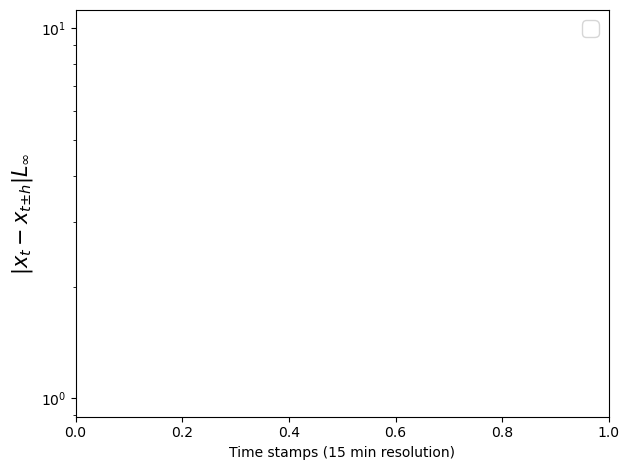

In [6]:
# stochasticity plot; max inside band, max outside band

for city_ in config.city_list:
    city = city_.lower() 
    for io_len in [4]: # range(1,9):
        for pred_horiz in [1]: # config.pred_horiz_def:
            for scale in config.scales_def:
                print (city, io_len, pred_horiz, scale)

                prefix = ProcessRaw.file_prefix(cityname=city, io_length=io_len, pred_horiz=pred_horiz, scale=scale)

                obj = ProcessRaw(cityname=city, i_o_length=io_len, prediction_horizon=pred_horiz, grid_size=scale)
                    
                folderpath = os.path.join(config.DATA_FOLDER, config.train_folder_name, prefix)
                filenameslist = glob.glob(folderpath + "/*_x.npy")
                
                random.shuffle(filenameslist)
                
                
                multiple_source_distance_list = []
                multiple_source_temp_distance_list = []
                for _ in tqdm(range(10), desc="Iterating over 100 random source files"):
                    random.shuffle(filenameslist) # inefficient method of choosing a random filename
                    
                    dist_list = []
                    temp_dist_list = []
                    
                    # choose_filename until we get something in the middle of the dataset so that 
                    # we can iterate over weeks
                    
                    
                    source_file = filenameslist[0]
                    source_x = np.load(source_file)
                    # integer id of filename
                    n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                    
                    while ( n - 14 * obj.offset < 0 or n + 14 * obj.offset > 8500 ): # 8500 number of training data points across all scenarios.
                        # keep looking for a source point near the centre of the dataset 
                        # so that we can look one week ahead and behind
                        
                        random.shuffle(filenameslist) # inefficient method of choosing a random filename
                        
                        source_file = filenameslist[0]
                        # integer id of filename
                        n = int(source_file.split(prefix)[-1].replace("_x.npy", ""))
                        source_x = np.load(source_file)

                        
                    # sprint (n)

                    # Now, we iterate through one week of temporal neighbours
                    # 3 days before and 3 days after
                    for i in range(n-3*obj.offset, n+3*obj.offset):

                        neighbour_filename = (source_file.split(prefix)[0] + \
                                   prefix + \
                                   source_file.split(prefix)[1] + \
                                   prefix + \
                                   str(i) + "_x.npy")
                        neighbour = np.load(neighbour_filename)
                        
                        dist_list.append (np.max(np.abs( neighbour - source_x)) )
                        temp_dist_list.append(i % obj.offset)
                        
                    multiple_source_distance_list.append(dist_list)
                    multiple_source_temp_distance_list.append(temp_dist_list)

                    
                multiple_source_distance_list = np.array(multiple_source_distance_list)
                multiple_source_temp_distance_list = np.array(multiple_source_temp_distance_list)
                
              
                # median_plot = (np.median(multiple_source_distance_list, axis=0))
                # plt.plot(np.convolve(median_plot, [1/1]*1, "valid"), label= prefix + " median plot ")
                
                
                sprint (prefix)
            #     break
            # break
        # break
    # break
plt.ylabel(r'$\|x_t-x_{t{\pm}h}\|L_{\infty}$', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("Time stamps (15 min resolution)")
plt.yscale('log')
plt.tight_layout()
plt.savefig("city_list_scales_4_1.png", dpi=600)
plt.show()   # obj._clean_intermediate_files()

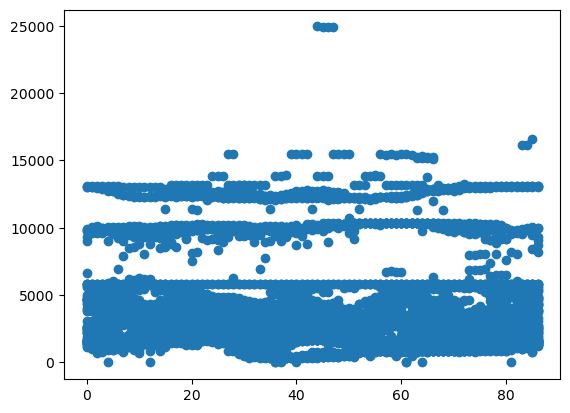

In [20]:
plt.scatter(multiple_source_temp_distance_list.flatten(), multiple_source_distance_list.flatten())

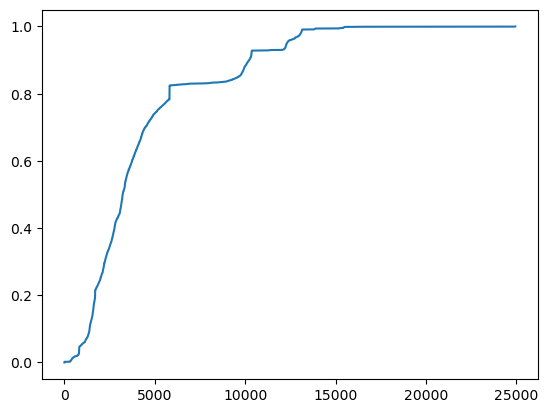

In [17]:
# https://stackoverflow.com/a/65972406/3896008

import matplotlib.pyplot as plt
import numpy as np

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1] 

def plot_ecdf(a, label="dummy"):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y) # , drawstyle='steps-post')
    # plt.grid(True)

    # plt.savefig('ecdf.png')

    
plot_ecdf(multiple_source_distance_list.flatten(), "dist")
# plot_ecdf(multiple_source_temp_distance_list.flatten(), "dist")
# plt.plot(multiple_source_temp_distance_list.flatten())
# plt.legend()
plt.show()

In [14]:
# let us capture 45 nearest neighbours; get their max distance
# get the max distance according to our approximation

'/Users/nishant/Downloads/NeurIPS2022-traffic4cast/train_data_all_cities/london-4-1-55-'